<a href="https://colab.research.google.com/github/EUPHIEEE/FunProjects/blob/main/TweepyFinal_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

The code is in a done state.

After First run, please refresh the Query Number and re-run from the "Tweepy Time" Section.

If the tweet being queried is more than 14 days old it will not run.
Please replace the tweets convo id with a new tweet.
(ie: for the tweet url-> https://twitter.com/smittytds/status/1604195154973364224 the convo id is 1604195154973364224)

Note: the program may the program return an error, at  

```
y_guess = rf_clf.predict(X_guess)
```

 in "make compareable to before section" due to the differences in tweet replies collected.

 To resolve this please comment out the line below. (It is directly above the line throwing the error)

 ```
result.drop(columns=['geo_place_id' ], inplace = True, axis =1)
```






# Entries...

Catagories for tweets selected
1. Sports Related Tweet from Official Platform
<!-- B/R Football Account -->
2. Tweet from a Democratic Senator
<!-- AOC regarding PR -->
3. Tweet from a Republican Senator
<!-- Matt Shultz... trumper -->
4. Tweet from a journalist regarding a controversial domestic issue
<!-- NMBC Correspeondent over medial issues -->
5. Tweet from a journalist covering a controversial international issue
<!-- Iran Protests from @yashan -->
6. Tweet with the "WTS" hashtag
<!-- for photobook... could only find with 30 replies -->
7. Tweet from an artist
<!-- Sam Yang -->
8. Tweet from a musician
<!-- from woodz tweet -->

In [ ]:
# QUERYS

QUERY1 = 'conversation_id:1599386592463855616 -is:retweet '

QUERY2 = 'conversation_id:1603500943307317250 -is:retweet '

QUERY3 = 'conversation_id:1603230559630753793 -is:retweet '

QUERY4 = 'conversation_id:1603519928912547841 -is:retweet '

QUERY5 = 'conversation_id:1602413902419005441 -is:retweet '

QUERY6 = 'conversation_id:1601782961128771584 -is:retweet '

QUERY7 = 'conversation_id:1602351149184684043 -is:retweet '

QUERY8 = 'conversation_id:1602696363984441346 -is:retweet '



QUERY = QUERY8



# Read in Dataset

dataset from kaggle url below

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
# dataset_url = "kaggle kernels output davidmartngutirrez/bots-accounts-eda -p /path/to/dest"


from google.colab import drive
drive.mount('/content/drive')
#!ls

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
dataset = pd.read_csv('twitter_human_bots_dataset.csv', parse_dates=['created_at'])

dataset['created_at'] = pd.to_numeric(pd.to_datetime(dataset['created_at']))
dataset.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,1476567131000000000,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,1478667690000000000,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,1497677667000000000,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,1469107945000000000,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,1326645155000000000,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  int64  
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30182 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37435 non-null  object 
 12  profile_background_image_url  32939 non-null  object 
 13  p

# Processing the Data

process data


** note, df_str is a stripped down version of the origional dataframe, which removes any text from the learning model due to complications... instead the information is transformed into boolen true and false in 0s and 1s, for the supervised learning algorthims to comprehend and train on. Lastly, the tweet description attribute is broken down based on the number of words in the tweet,,, this is something I would like to vectorize better moving forward.

In [ ]:
df_str = dataset.copy()

df_str

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,1476567131000000000,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,1478667690000000000,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,1497677667000000000,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,1469107945000000000,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,1326645155000000000,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,37433,1249737075000000000,True,False,"Role: Stock Taker. Past Roles: Nanny, Sales As...",651,139,1105,False,63963107,en,Kingston Upon Hull,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5844684414...,butchsekab,340,False,0.084,4028,human
37434,37434,1357421737000000000,False,False,KINGDOM LANDLORD #FreeCornBread,8839,1121486,605,True,1064042478,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9511349456...,Mathieu_Era,24970,True,8.976,2782,human
37435,37435,1358186754000000000,True,False,Bienvenid@s al Twitter Oficial de Sergio Dalma...,399,85630,190,False,1089732602,it,En constante movimiento,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1174733822...,SDalmaoficial,6174,True,2.226,2773,human
37436,37436,1347293522000000000,False,False,Just a good guy wrapped up in a bad system.\nA...,967,138,166,True,815529979,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1265807908...,VinceYearly,982,False,0.339,2899,human


In [ ]:
# numericify everything

#  0 is true / info present
#  1 is false/ no info

df_str.loc[(df_str.default_profile) == 'false', "default_profile" ] = 1
df_str.loc[(df_str.default_profile) != 'false', "default_profile" ] = 0
df_str["default_profile"].astype(np.int64)

df_str.loc[(df_str.default_profile_image) == 'false', "default_profile_image" ] = 1
df_str.loc[(df_str.default_profile_image) != 'false', "default_profile_image" ] = 0
df_str['default_profile_image'] = pd.Series(df_str['default_profile_image'], dtype="int64")

df_str.loc[(df_str.geo_enabled) == 'false', "geo_enabled" ] = 1
df_str.loc[(df_str.geo_enabled) != 'false', "geo_enabled" ] = 0
df_str['geo_enabled'] = pd.Series(df_str['geo_enabled'], dtype="int64")


df_str.loc[(df_str.lang) == 'en', "lang" ] = 0
df_str.loc[(df_str.lang) != 'en', "lang" ] = 1
df_str['lang'] = pd.Series(df_str['lang'], dtype="int64")


df_str.loc[(df_str.verified) == 'false', "verified" ] = 1
df_str.loc[(df_str.verified) != 'false', "verified" ] = 0
df_str['verified'] = pd.Series(df_str['verified'], dtype="int64")


df_str.loc[(df_str.account_type) == 'bot', "account_type" ] = 1
df_str.loc[(df_str.account_type) == 'human', "account_type" ] = 0
df_str['account_type'] = pd.Series(df_str['account_type'], dtype="int64")


df_str.loc[(df_str.location) == 'unknown', "location" ] = 1
df_str.loc[(df_str.location) != 'unknown', "location" ] = 0
df_str['location'] = pd.Series(df_str['location'], dtype="int64")


dataset['description_str'] = dataset['description'].str.split(',')
dataset['description_str'] = pd.Series(dataset['description_str'], dtype="string")

df_str.loc[(df_str.description) == 'NaN', "description" ] = 1
df_str.loc[(df_str.description) != 'NaN', "description" ] = dataset['description'].apply(lambda x: len(str(x).split(' ')))
df_str['description'] = pd.Series(df_str['description'], dtype="int64")



df_str.drop(columns=['Unnamed: 0', 'profile_background_image_url', 'profile_image_url', 'id', 'screen_name'], inplace = True, axis =1)


In [ ]:
# temp to get rid of obj

df_str.drop(['default_profile'], inplace = True, axis =1)

df_str.sample()


,created_at,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
12668,1414857654000000000,0,19,26,433,349,0,1,0,1125,0,0.531,2117,0


In [ ]:
df_str.sample(5)

df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              37438 non-null  int64  
 1   default_profile_image   37438 non-null  int64  
 2   description             37438 non-null  int64  
 3   favourites_count        37438 non-null  int64  
 4   followers_count         37438 non-null  int64  
 5   friends_count           37438 non-null  int64  
 6   geo_enabled             37438 non-null  int64  
 7   lang                    37438 non-null  int64  
 8   location                37438 non-null  int64  
 9   statuses_count          37438 non-null  int64  
 10  verified                37438 non-null  int64  
 11  average_tweets_per_day  37438 non-null  float64
 12  account_age_days        37438 non-null  int64  
 13  account_type            37438 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [ ]:
def text_preprocess(sen):

   sen = re.sub('[^a-zA-Z]', ' ', sen)

   sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)

   sen = re.sub(r'\s+', ' ', sen)

   return sen

#  code found online... doesnt function as I would like...

In [ ]:
# X_tweets = []
# messages = list(X)
# for mes in messages:
#     messages[mes] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", mes).split())

In [ ]:
# from tqdm import tqdm

# import re
# !pip install emoji==1.7
# import emoji
# import nltk
# nltk.download('words')
# words = set(nltk.corpus.words.words())


# def cleaner(tweet):
#     tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
#     tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
#     tweet = " ".join(tweet.split())
#     tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
#     tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
#     tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
#          if w.lower() in words or not w.isalpha())
#     return tweet



# dataset['description_str'] = dataset['description_str'].str.replace(r'[^\w\s]+', '')

# # dataset['description_str'] = dataset['description_str'].map(lambda x: cleaner(x))

# dataset['description_str']=cleaner(dataset['description_str'])

In [ ]:


# X.drop(columns=['Unnamed: 0', 'profile_background_image_url', 'profile_image_url', 'screen_name'], inplace=True, axis=1)

In [ ]:
# import nltk
# nltk.download('stopwords')


# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# features = tfidf.fit_transform(dataset.description_str).toarray()
# labels = dataset.category_id
# features.shape

In [ ]:

# tfidf_vec = TfidfVectorizer (max_features=5000, min_df=50, max_df=0.8, stop_words=stopwords.words('english'))
# X= tfidf_vec.fit_transform(list(dataset['description'])).toarray()

# Fit and Train Model

In [ ]:
# seperate into x and y
X = df_str.iloc[:,:-1]
y = df_str.iloc[:, -1]

In [ ]:
# X.info()

X

,created_at,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days
0,1476567131000000000,0,17,4,1589,4,0,1,0,11041,0,7.870,1403
1,1478667690000000000,0,24,536,860,880,0,1,0,252,0,0.183,1379
2,1497677667000000000,0,9,3307,172,594,0,1,0,1001,0,0.864,1159
3,1469107945000000000,0,9,8433,517,633,0,1,0,1324,0,0.889,1489
4,1326645155000000000,0,7,88,753678,116,0,1,0,4202,0,1.339,3138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,1249737075000000000,0,20,651,139,1105,0,1,0,340,0,0.084,4028
37434,1357421737000000000,0,3,8839,1121486,605,0,1,0,24970,0,8.976,2782
37435,1358186754000000000,0,8,399,85630,190,0,1,0,6174,0,2.226,2773
37436,1347293522000000000,0,16,967,138,166,0,1,0,982,0,0.339,2899


In [ ]:
y

0        1
1        0
2        0
3        0
4        0
        ..
37433    0
37434    0
37435    0
37436    0
37437    1
Name: account_type, Length: 37438, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=250, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)


In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=10)
# print("CV average score: %.2f" % cv_scores.mean())

In [ ]:



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

as_scores = accuracy_score(y_test,y_pred)

print("CV average score:  %.2f" % as_scores)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


accuracy_score

CV average score:  0.88
[[5917  374]
 [ 748 2321]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6291
           1       0.86      0.76      0.81      3069

    accuracy                           0.88      9360
   macro avg       0.87      0.85      0.86      9360
weighted avg       0.88      0.88      0.88      9360



<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm, datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

lsvc = LinearSVC()
lsvc.dual=False
max_iter=1200
print(lsvc)

print()

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr)

LinearSVC(dual=False)

Score:  0.6667853835743287
CV average score: 0.67
[[6291    0]
 [3069    0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6291
           1       0.00      0.00      0.00      3069

    accuracy                           0.67      9360
   macro avg       0.34      0.50      0.40      9360
weighted avg       0.45      0.67      0.54      9360



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ypred = clf.predict(X_test)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr)

CV average score: 0.67
[[6291    0]
 [3069    0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6291
           1       0.00      0.00      0.00      3069

    accuracy                           0.67      9360
   macro avg       0.34      0.50      0.40      9360
weighted avg       0.45      0.67      0.54      9360



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ypred = clf.predict(X_test)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr)

CV average score: 0.82
[[5441  850]
 [ 757 2312]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6291
           1       0.73      0.75      0.74      3069

    accuracy                           0.83      9360
   macro avg       0.80      0.81      0.81      9360
weighted avg       0.83      0.83      0.83      9360



**Random Forest Classifier has the highest accuracy**

⚜

# Dataset information statistics and graphics

note: the dataset is largely english tweet focused for training...

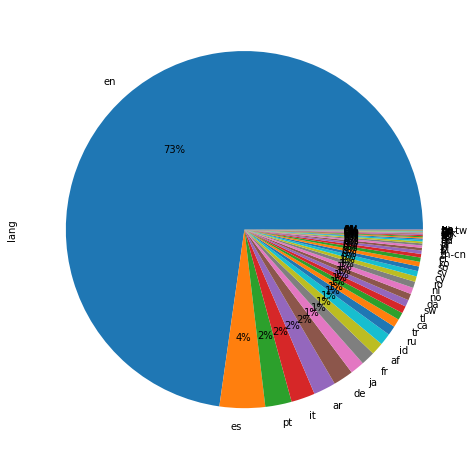

In [ ]:
plt.rcParams["figure.figsize"] = [8,10]
dataset['lang'].value_counts().plot(kind='pie', autopct='%1.0f%%')


In [ ]:
#this may be something to look into more with the new verfied rules

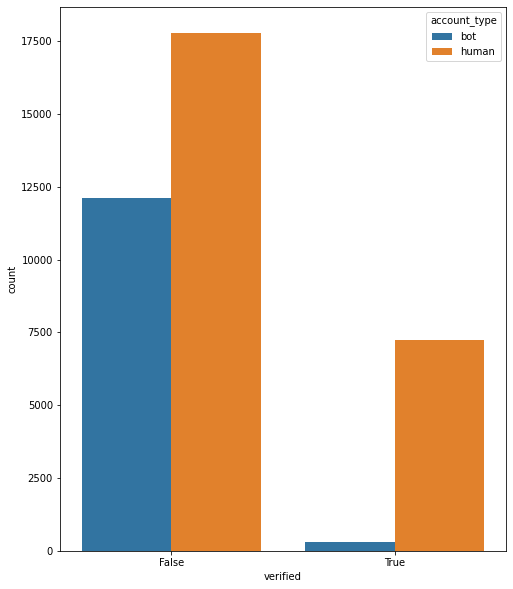

In [ ]:
sns.countplot(x='verified', data=dataset, hue = 'account_type')

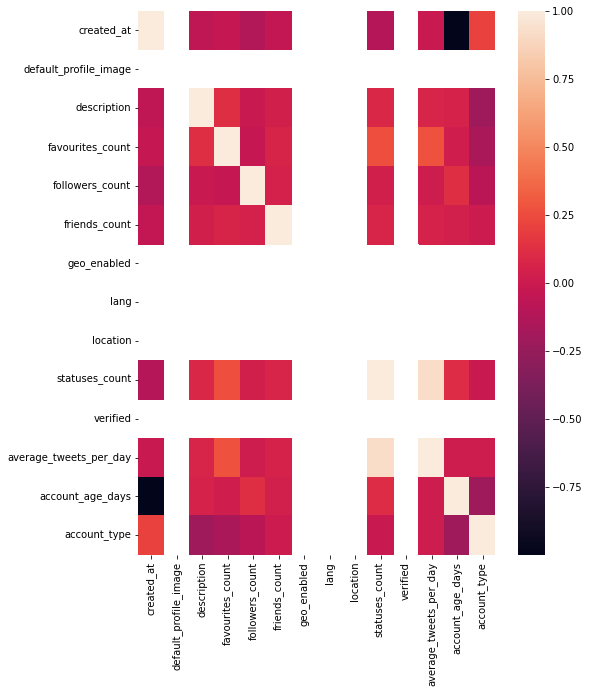

In [ ]:
# sns.heatmap(df_str.corr())

# Tweepy Time + More Json Cleaning


some setup first....

In [ ]:
# Before getting started with any code, you need to visit the Twitter API
# (https://developer.twitter.com/en) website and...
# 1. apply for a developer account
# 2. then create an "project"
# 3. then copy+paste the various keys, secrets, and tokens into the following cell.

my_consumer_key = "zHdTAf14Ry1pmhtITxYSrG5Us"
my_consumer_secret = "8r7TcS79tbAVlgc1eMxHy02ZJFUXJGNs5QDHxQtjpGC95LAKCa"

my_access_token = "1143553897497268224-MFdX58P0RP1TkZUukcM3JNVx7zvr5H"
my_access_secret = "kWgWpfm2HsiQlwWsmyQdWr3O1Lt15CSrWEN9gTshdKBlZ"

my_bearer_token = 'AAAAAAAAAAAAAAAAAAAAALc6jAEAAAAA13Z%2FkK%2B6Eksq0CMQ%2FqtB4Gylei8%3DvfM5e5DR5mTzflchJ8U4Yea5lI0OTBvu1Sk1l42ECfiLOYmv4Z'

In [ ]:
# fully installed and overwrites any preexisting installations.

!pip install git+https://github.com/tweepy/tweepy.git --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-kp5lw_s3
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-kp5lw_s3


In [ ]:
# Import the tweepy package
import tweepy

# Import a variety of other packages that may be useful for working with data.
import pandas as pd
import json
import time

In [ ]:
# Using the tweepy.Client(...) function, you can establish a connection to the
# Twitter API.  The example below shows a robust way of creating a "client" object
#  by passing your credentials to appropriate parameters.

# Additionally, the "wait_on_rate_limit" parameter is set to True at this stage.
# This will be explained more later, but this helps to overcome a lot of errors
#  associated with API usage limitations.

client = tweepy.Client(
    wait_on_rate_limit = True,
    consumer_key = my_consumer_key,
    consumer_secret = my_consumer_secret,
    access_token = my_access_token,
    access_token_secret = my_access_secret,
    bearer_token = my_bearer_token,
)

In [ ]:
# Test to make sure the client object exists

client

In [ ]:
data_tweets = pd.DataFrame()

# for i in users_group.data:
#   temp_data = pd.json_normalize( i.data ,  sep = "_")
#   data_tweets = data_tweets.append( temp_data , ignore_index=True )

In [ ]:
data_tweets

""


0    created_at              37438 non-null  int64  
 1   default_profile_image   37438 non-null  int64  
 2   description             37438 non-null  int64  
 3   favourites_count        37438 non-null  int64  
 4   followers_count         37438 non-null  int64  
 5   friends_count           37438 non-null  int64  
 6   geo_enabled             37438 non-null  int64  
 7   id                      37438 non-null  int64  
 8   lang                    37438 non-null  int64  
 9   location                37438 non-null  int64  
 10  statuses_count          37438 non-null  int64  
 11  verified                37438 non-null  int64  
 12  average_tweets_per_day  37438 non-null  float64
 13  account_age_days        37438 non-null  int64  

In [ ]:
# users_group = client.search_recent_tweets(query= "help", )
query = QUERY
tweets = client.search_recent_tweets(query=query, tweet_fields=['lang', 'geo'], expansions=[ 'author_id'], user_fields=[ 'created_at', 'profile_image_url', 'description', 'name',"public_metrics", 'verified', 'location'], place_fields = ['country','country_code'], max_results=100)

convo_tweets = pd.DataFrame()

for i in tweets.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  convo_tweets = convo_tweets.append( temp_data , ignore_index=True )



convo_tweets.drop(columns=['id'], inplace = True, axis =1)



In [ ]:
# convo_tweets.info()

In [ ]:
# convo_tweets.sample(10)

In [ ]:
convo_tweets['author_id'] = pd.Series(convo_tweets['author_id'], dtype="string")

ids=list(convo_tweets['author_id'].copy())

users_group = client.get_users(
     ids= ids, user_fields = ["created_at", "description","profile_image_url","public_metrics","verified","location"])


data_users = pd.DataFrame()

for i in users_group.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  data_users = data_users.append( temp_data , ignore_index=True )
  # convo_tweets = convo_tweets.append( temp_data , ignore_index=True )


In [ ]:
# users_group.data

In [ ]:
# result = pd.concat([data_users, convo_tweets], axis=1)

In [ ]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   created_at                      98 non-null     object
 1   verified                        98 non-null     bool  
 2   profile_image_url               98 non-null     object
 3   username                        98 non-null     object
 4   description                     98 non-null     object
 5   name                            98 non-null     object
 6   id                              98 non-null     object
 7   public_metrics_followers_count  98 non-null     int64 
 8   public_metrics_following_count  98 non-null     int64 
 9   public_metrics_tweet_count      98 non-null     int64 
 10  public_metrics_listed_count     98 non-null     int64 
 11  location                        52 non-null     object
dtypes: bool(1), int64(4), object(7)
memory usage: 8.6+ K

In [ ]:
convo_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  98 non-null     object
 1   author_id               98 non-null     string
 2   text                    98 non-null     object
 3   lang                    98 non-null     object
 4   geo_place_id            1 non-null      object
dtypes: object(4), string(1)
memory usage: 4.0+ KB


In [ ]:
import tweepy

my_consumer_key = "zHdTAf14Ry1pmhtITxYSrG5Us"
my_consumer_secret = "8r7TcS79tbAVlgc1eMxHy02ZJFUXJGNs5QDHxQtjpGC95LAKCa"

my_access_token = "1143553897497268224-MFdX58P0RP1TkZUukcM3JNVx7zvr5H"
my_access_secret = "kWgWpfm2HsiQlwWsmyQdWr3O1Lt15CSrWEN9gTshdKBlZ"


auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_secret)

# get favorites

api = tweepy.API(auth)

In [ ]:
liked_tweets = api.get_favorites(user_id = ids, count =len(convo_tweets.axes[0]))
# len(convo_tweets.axes[0])

# liked_tweets2 = api.get_favorites(user_id = secondid)

In [ ]:
output = []
for tweet in liked_tweets:
    favourite_count = tweet.favorite_count
    geo_enabled = tweet.geo
    friends_count = tweet.user.friends_count

    line = { 'favourite_count' : favourite_count, 'friends_count': friends_count, 'geo_enabled' : geo_enabled }

    output.append(line)

In [ ]:
# liked_tweets

In [ ]:
# output

In [ ]:
likesper_users = pd.DataFrame(output)

result = pd.concat([data_users, convo_tweets, likesper_users], axis=1)

# convo_tweets = convo_tweets.append(output , ignore_index=True )



In [ ]:
# for status in liked_tweets:
#     print(status.user.favourites_count)

# print("start part 2")

# for status2 in liked_tweets2:
#     print(status2.user.favourites_count)

In [ ]:
# likesper_users

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   created_at                      98 non-null     object 
 1   verified                        98 non-null     bool   
 2   profile_image_url               98 non-null     object 
 3   username                        98 non-null     object 
 4   description                     98 non-null     object 
 5   name                            98 non-null     object 
 6   id                              98 non-null     object 
 7   public_metrics_followers_count  98 non-null     int64  
 8   public_metrics_following_count  98 non-null     int64  
 9   public_metrics_tweet_count      98 non-null     int64  
 10  public_metrics_listed_count     98 non-null     int64  
 11  location                        52 non-null     object 
 12  edit_history_tweet_ids          98 non

In [ ]:
result.sample(10)

,created_at,verified,profile_image_url,username,description,name,id,public_metrics_followers_count,public_metrics_following_count,public_metrics_tweet_count,public_metrics_listed_count,location,edit_history_tweet_ids,author_id,text,lang,geo_place_id,favourite_count,friends_count,geo_enabled
51,2019-06-04T07:07:43.000Z,False,https://pbs.twimg.com/profile_images/133578468...,barbaparpa,💙Seungyoun 🧡\n𝓢⋆ꮺଘꗃ๑ꕤꮺଘ & ᯅ𓂅ǂଘ,🍉I love you 🍉,1135805312840024064,26,726,19973,0,NaN,[1602858678998425601],1135805312840024064,@_chowoodz Love you 😘 https://t.co/4gBQVpv8MY,en,NaN,1.0,576.0,None
94,2021-12-29T20:42:14.000Z,False,https://pbs.twimg.com/profile_images/160161648...,vipmonstas,"⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀🍄🫧 mx7, svt & woodz !! ‹3",lya REASON,1476292451174387712,899,875,20077,12,"기현, 넌 나의 바다.",[1602822821532651520],1476292451174387712,@_chowoodz OI MEU AMOR,pt,NaN,7139.0,194.0,None
74,2018-03-21T15:23:41.000Z,False,https://pbs.twimg.com/profile_images/114025399...,cxxxrypink,조승연❤︎ スンヨンちゃんのインスタ更新うれしいから、勉強と記録を兼ねて更新してくれたもの訳...,cherry🍒조승연 WOODZ❤︎MOODZ 뭊,976479467257307136,94,29,583,0,NaN,[1602832100486365184],976479467257307136,@_chowoodz 승연이도 !! 감기 조심하세요 ~~&gt;&lt;,ko,NaN,3.0,319.0,None
14,2021-09-16T15:57:52.000Z,False,https://pbs.twimg.com/profile_images/158333264...,imycoolp,idk what to say,fin5d the cat,1438532569939677189,39,57,13204,1,missmyttcat,[1602989220078882816],1438532569939677189,@_chowoodz โอเค อ้วมด้วย🤓🤓❤️‍🩹❤️‍🩹❤️‍🩹❤️‍🩹,th,NaN,136.0,875.0,None
1,2022-07-20T17:19:20.000Z,False,https://pbs.twimg.com/profile_images/160355931...,Iightjeans,https://t.co/sCEHLdRdD6,rune 9,1549806152673902595,1301,964,7526,1,ot9 luné,[1603057537850302466],1549806152673902595,@_chowoodz Okay.😭😭😭😭😭😭😭😭😭,en,NaN,12836.0,195.0,None
90,2020-02-09T17:31:33.000Z,False,https://pbs.twimg.com/profile_images/160167526...,arspearb,⠀ esperando o Day6 sair do exército,mary 🎄,1226559240690700294,1356,1293,29240,9,Kim Seokjin ⚔,[1602823914362642433],1226559240690700294,@_chowoodz e vc se cuide tbm,pt,NaN,16580.0,521.0,None
30,2020-12-10T05:30:50.000Z,False,https://pbs.twimg.com/profile_images/147262577...,luvbi131,you are born to be more. //multi fan,shy🦋,1336906160746635264,128,564,17989,1,s/her,[1602906663589060608],1336906160746635264,@_chowoodz stay safe love,en,NaN,2.0,622.0,None
52,2020-03-19T18:17:32.000Z,False,https://pbs.twimg.com/profile_images/160305252...,voicewoozi,͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ 𓏲࣪ ....,miri 𖦹 black eye 🐈‍⬛,1240703928007712769,792,620,9462,12,･⭑ 131,[1602855319750594560],1240703928007712769,@_chowoodz al menos compartimos la misma estac...,es,NaN,87.0,221.0,None
46,2011-09-05T13:41:31.000Z,False,https://pbs.twimg.com/profile_images/156305670...,meandmyjubjib,𝙪𝙣𝙩𝙞𝙡 𝙬𝙚 𝙢𝙚𝙚𝙩 𝙖𝙜𝙖𝙞𝙣 ∙◡̉̈∙,𓂋𝘁𝗼𝗺𝗮𝘁𝗼𝗵𝗮𝘁𝗲𝗿 🍅꒱,368339271,409,271,185301,5,oshoswhswkwscsynjm♡ᵎ,[1602865113761206272],368339271,@_chowoodz คิดถึงเองอะอ้วง🥹🥹🥹🖐🏽,th,NaN,1.0,496.0,None
89,2022-07-09T11:50:51.000Z,False,https://pbs.twimg.com/profile_images/159799075...,dream_dnwm,조.. 라는 남자 복습 중,♡,1545737206563622913,1550,83,27637,11,WOODZ,[1602823916250345474],1545737206563622913,@_chowoodz 승여나 .. 너두 따듯하게 입고 댕겨..🫶,ko,NaN,96.0,1513.0,None


# Clean Dataset and make comparable to before

<!-- gotta be like before lol -->

<!-- reorder

shift everything into bits from true false -->

In [ ]:
result.insert(0, 'created_at', result.pop('created_at'))

In [ ]:
from datetime import datetime

# for date in d
result['created_at'] = pd.to_numeric(pd.to_datetime(dataset['created_at']))
result['days_created'] = (pd.to_datetime(result['created_at'], format='%Y/%m/%d')-(pd.to_datetime('2022/12/1', format='%Y/%m/%d'))).dt.days * -1


# result['created_at'] = pd.to_numeric(pd.to_datetime(dataset['created_at']))

In [ ]:
result ['average_tweets_per_day'] = result['public_metrics_tweet_count']/result['days_created']

In [ ]:
# result['days_created'].sample(2)

In [ ]:
# result.sample()

<!-- 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png' -->

In [ ]:
result.location.sample(10)

43                               NaN
82                             🇹🇭’04
63                               NaN
65    I lost everything that is you.
39                               NaN
92                               NaN
96                               NaN
90                     Kim Seokjin ⚔
95                      mana aja dah
76                        mimaropa🍡🍜
Name: location, dtype: object

In [ ]:
# numericify everything

#  0 is true / info present
#  1 is false/ no info

result.loc[(result.profile_image_url) != 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', "default_profile_image" ] = 0
result.loc[(result.profile_image_url) == 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', "default_profile_image" ] = 1
result['default_profile_image'] = pd.Series(df_str['default_profile_image'], dtype="int64")


result.loc[(result.description) == 'NaN', "description" ] = 0
result.loc[(result.description) != 'NaN', "description" ] = dataset['description'].apply(lambda x: len(str(x).split(' ')))
result['description'] = pd.Series(result['description'], dtype="int64")


# result.loc[(result.default_profile_image) == '0' ,"default_profile" ] = 0
# result.loc[(result.default_profile_image) == '1', "default_profile" ] = 1
# result.loc[(result.description) !=0, "default_profile" ] = 1
# result['default_profile'] = pd.Series(result['default_profile'], dtype="int64")


result.loc[(result.geo_enabled) == 'None', "geo_enabled" ] = 1
result.loc[(result.geo_enabled) != 'None', "geo_enabled" ] = 0
result.loc[(result.geo_enabled) == 'NaN', "geo_enabled" ] = 0

result['geo_enabled'] = pd.Series(result['geo_enabled'], dtype="int64")


result.loc[(result.lang) == 'en', "lang" ] = 0
result.loc[(result.lang) != 'en', "lang" ] = 1
result['lang'] = pd.Series(result['lang'], dtype="int64")


result.loc[(result.verified) == 'false', "verified" ] = 1
result.loc[(result.verified) != 'false', "verified" ] = 0
result['verified'] = pd.Series(result['verified'], dtype="int64")


result.loc[(result.location) == 'NaN', "location" ] = 1
result.loc[(result.location) != 'NaN', "location" ] = 0
result['location'] = pd.Series(result['location'], dtype="int64")

result.loc[(result.favourite_count) == 'NaN', "favourite_count" ] = 0
result.loc[(result.friends_count) == 'NaN', "friends_count" ] = 0




# dataset['description_str'] = dataset['description'].str.split(',')
# dataset['description_str'] = pd.Series(dataset['description_str'], dtype="string")

# result.loc[(result.description) == 'NaN', "description" ] = 1
# result.loc[(result.description) != 'NaN', "description" ] = dataset['description'].apply(lambda x: len(str(x).split(' ')))
# result['description'] = pd.Series(result['description'], dtype="int64")



result.drop(columns=['username', 'name', 'text', 'edit_history_tweet_ids', 'profile_image_url','author_id', 'id', 'public_metrics_following_count', 'public_metrics_listed_count' ], inplace = True, axis =1)


In [ ]:
# reorder cols for model

result.insert(1, 'default_profile_image', result.pop('default_profile_image'))
result.insert(2, 'description', result.pop('description'))
result.insert(3, 'favourite_count', result.pop('favourite_count'))
result.insert(4, 'public_metrics_followers_count', result.pop('public_metrics_followers_count'))
result.insert(5, 'friends_count', result.pop('friends_count'))
result.insert(6, 'geo_enabled', result.pop('geo_enabled'))
# result.insert(0, 'id', result.pop('id'))
result.insert(7, 'lang', result.pop('lang'))
result.insert(8, 'location', result.pop('location'))
result.insert(9, 'public_metrics_tweet_count', result.pop('public_metrics_tweet_count'))
result.insert(10, 'verified', result.pop('verified'))
result.insert(11, 'average_tweets_per_day', result.pop('average_tweets_per_day'))
result.insert(12, 'days_created', result.pop('days_created'))




In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   created_at                      98 non-null     int64  
 1   default_profile_image           98 non-null     int64  
 2   description                     98 non-null     int64  
 3   favourite_count                 97 non-null     float64
 4   public_metrics_followers_count  98 non-null     int64  
 5   friends_count                   97 non-null     float64
 6   geo_enabled                     98 non-null     int64  
 7   lang                            98 non-null     int64  
 8   location                        98 non-null     int64  
 9   public_metrics_tweet_count      98 non-null     int64  
 10  verified                        98 non-null     int64  
 11  average_tweets_per_day          98 non-null     float64
 12  days_created                    98 non

In [ ]:
df_str.sample(2)

,created_at,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
31607,1382518795000000000,0,1,1146,17,0,0,1,0,1624,0,0.652,2492,1
22818,1322351567000000000,0,17,4653,74,114,0,1,0,520,0,0.163,3188,0


COls needed:
<!-- 0    created_at              37438 non-null  int64   -->
 <!-- 1   default_profile_image   37438 non-null  int64   -->
 <!-- 2   description             37438 non-null  int64   -->
 3   favourites_count        37438 non-null  int64  
 <!-- 4   followers_count         37438 non-null  int64  
 5   friends_count           37438 non-null  int64   -->
 <!-- 6   geo_enabled             37438 non-null  int64   -->
 <!-- 7   id                      37438 non-null  int64  
 8   lang                    37438 non-null  int64   -->
 <!-- 9   location                37438 non-null  int64   -->
 <!-- 10  statuses_count          37438 non-null  int64  (tweet count) -->
 <!-- 11  verified                37438 non-null  int64   -->
 <!-- 12  average_tweets_per_day  37438 non-null  float64 (math)
 13  account_age_days     (calc from created at) -->

Use twitter Api to get tweets and pull the information into a dataframe

# Model Tweet info

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   created_at                      98 non-null     int64  
 1   default_profile_image           98 non-null     int64  
 2   description                     98 non-null     int64  
 3   favourite_count                 97 non-null     float64
 4   public_metrics_followers_count  98 non-null     int64  
 5   friends_count                   97 non-null     float64
 6   geo_enabled                     98 non-null     int64  
 7   lang                            98 non-null     int64  
 8   location                        98 non-null     int64  
 9   public_metrics_tweet_count      98 non-null     int64  
 10  verified                        98 non-null     int64  
 11  average_tweets_per_day          98 non-null     float64
 12  days_created                    98 non

In [ ]:
result.rename(columns = {'days_created':'account_age_days', 'favourite_count':'favourites_count', 'public_metrics_followers_count': 'followers_count', 'public_metrics_tweet_count':'statuses_count'  }, inplace = True)

In [ ]:
result.replace([np.inf, -np.inf], np.nan, inplace=True)
result.fillna(0, inplace=True)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              98 non-null     int64  
 1   default_profile_image   98 non-null     int64  
 2   description             98 non-null     int64  
 3   favourites_count        98 non-null     float64
 4   followers_count         98 non-null     int64  
 5   friends_count           98 non-null     float64
 6   geo_enabled             98 non-null     int64  
 7   lang                    98 non-null     int64  
 8   location                98 non-null     int64  
 9   statuses_count          98 non-null     int64  
 10  verified                98 non-null     int64  
 11  average_tweets_per_day  98 non-null     float64
 12  account_age_days        98 non-null     int64  
 13  geo_place_id            98 non-null     object 
dtypes: float64(3), int64(10), object(1)
memory u

In [ ]:
result.sample()

,created_at,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,geo_place_id
68,1343014055000000000,0,1,1.0,296,719.0,0,1,0,12110,0,3.201163,3783,0


In [ ]:
result.drop(columns=['geo_place_id' ], inplace = True, axis =1)
# if error comment out

In [ ]:
X_guess = result.iloc[:]

In [ ]:
y_guess = rf_clf.predict(X_guess)

In [ ]:
y_guess

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
 y_guess[2]

1

# Final Calcs

In [ ]:
human_count = len(y_guess)
i =0
while( i < y_guess.size):
  # print(y_guess[i])
  human_count = (human_count - y_guess[i])
  i += 1


human_count



51

In [ ]:
percentage_human = human_count/y_guess.size

percentage_human

0.5204081632653061

In [ ]:
len(y_guess)

98

In [ ]:
# put into model to get predictions

In [ ]:

type_account = pd.DataFrame(columns=['type'])
for i in y_guess:
  type_account = type_account.append({'type': y_guess[i]}, ignore_index=True)

type_account['type']=pd.Series(y_guess)

result = pd.concat([result, type_account], axis=1)

In [ ]:
result.head(20)

,created_at,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,type
0,1476567131000000000,0,17,840.0,23,440.0,0,1,0,312,0,0.139410,2238,0
1,1478667690000000000,0,24,12836.0,1301,195.0,0,1,0,7526,0,3.400813,2213,0
2,1497677667000000000,0,9,1.0,0,548.0,0,1,0,340,0,0.170597,1993,1
3,1469107945000000000,0,9,2.0,792,548.0,0,1,0,57077,0,24.559811,2324,1
4,1326645155000000000,0,7,5.0,24,19875.0,0,1,0,57112,0,14.375031,3973,1
5,1479768630000000000,0,11,5.0,2,1892.0,0,1,0,70,0,0.031804,2201,1
6,1247091779000000000,0,14,4.0,330,282.0,0,1,0,40507,0,8.276870,4894,0
7,1347048093000000000,0,3,4.0,139,351.0,0,1,0,8650,0,2.314691,3737,0
8,1355658204000000000,0,1,4.0,841,351.0,0,1,0,89499,0,24.607919,3637,1
9,1329233628000000000,0,19,3720.0,7,430.0,0,1,0,201,0,0.050976,3943,0


# Result Plots

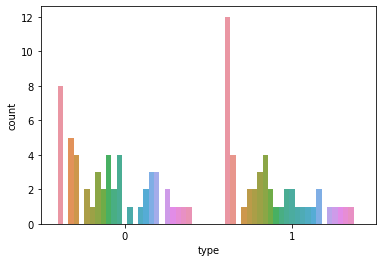

In [ ]:
sns.countplot(x='type', data=result, hue = 'description')
plt.legend([],[], frameon=False)

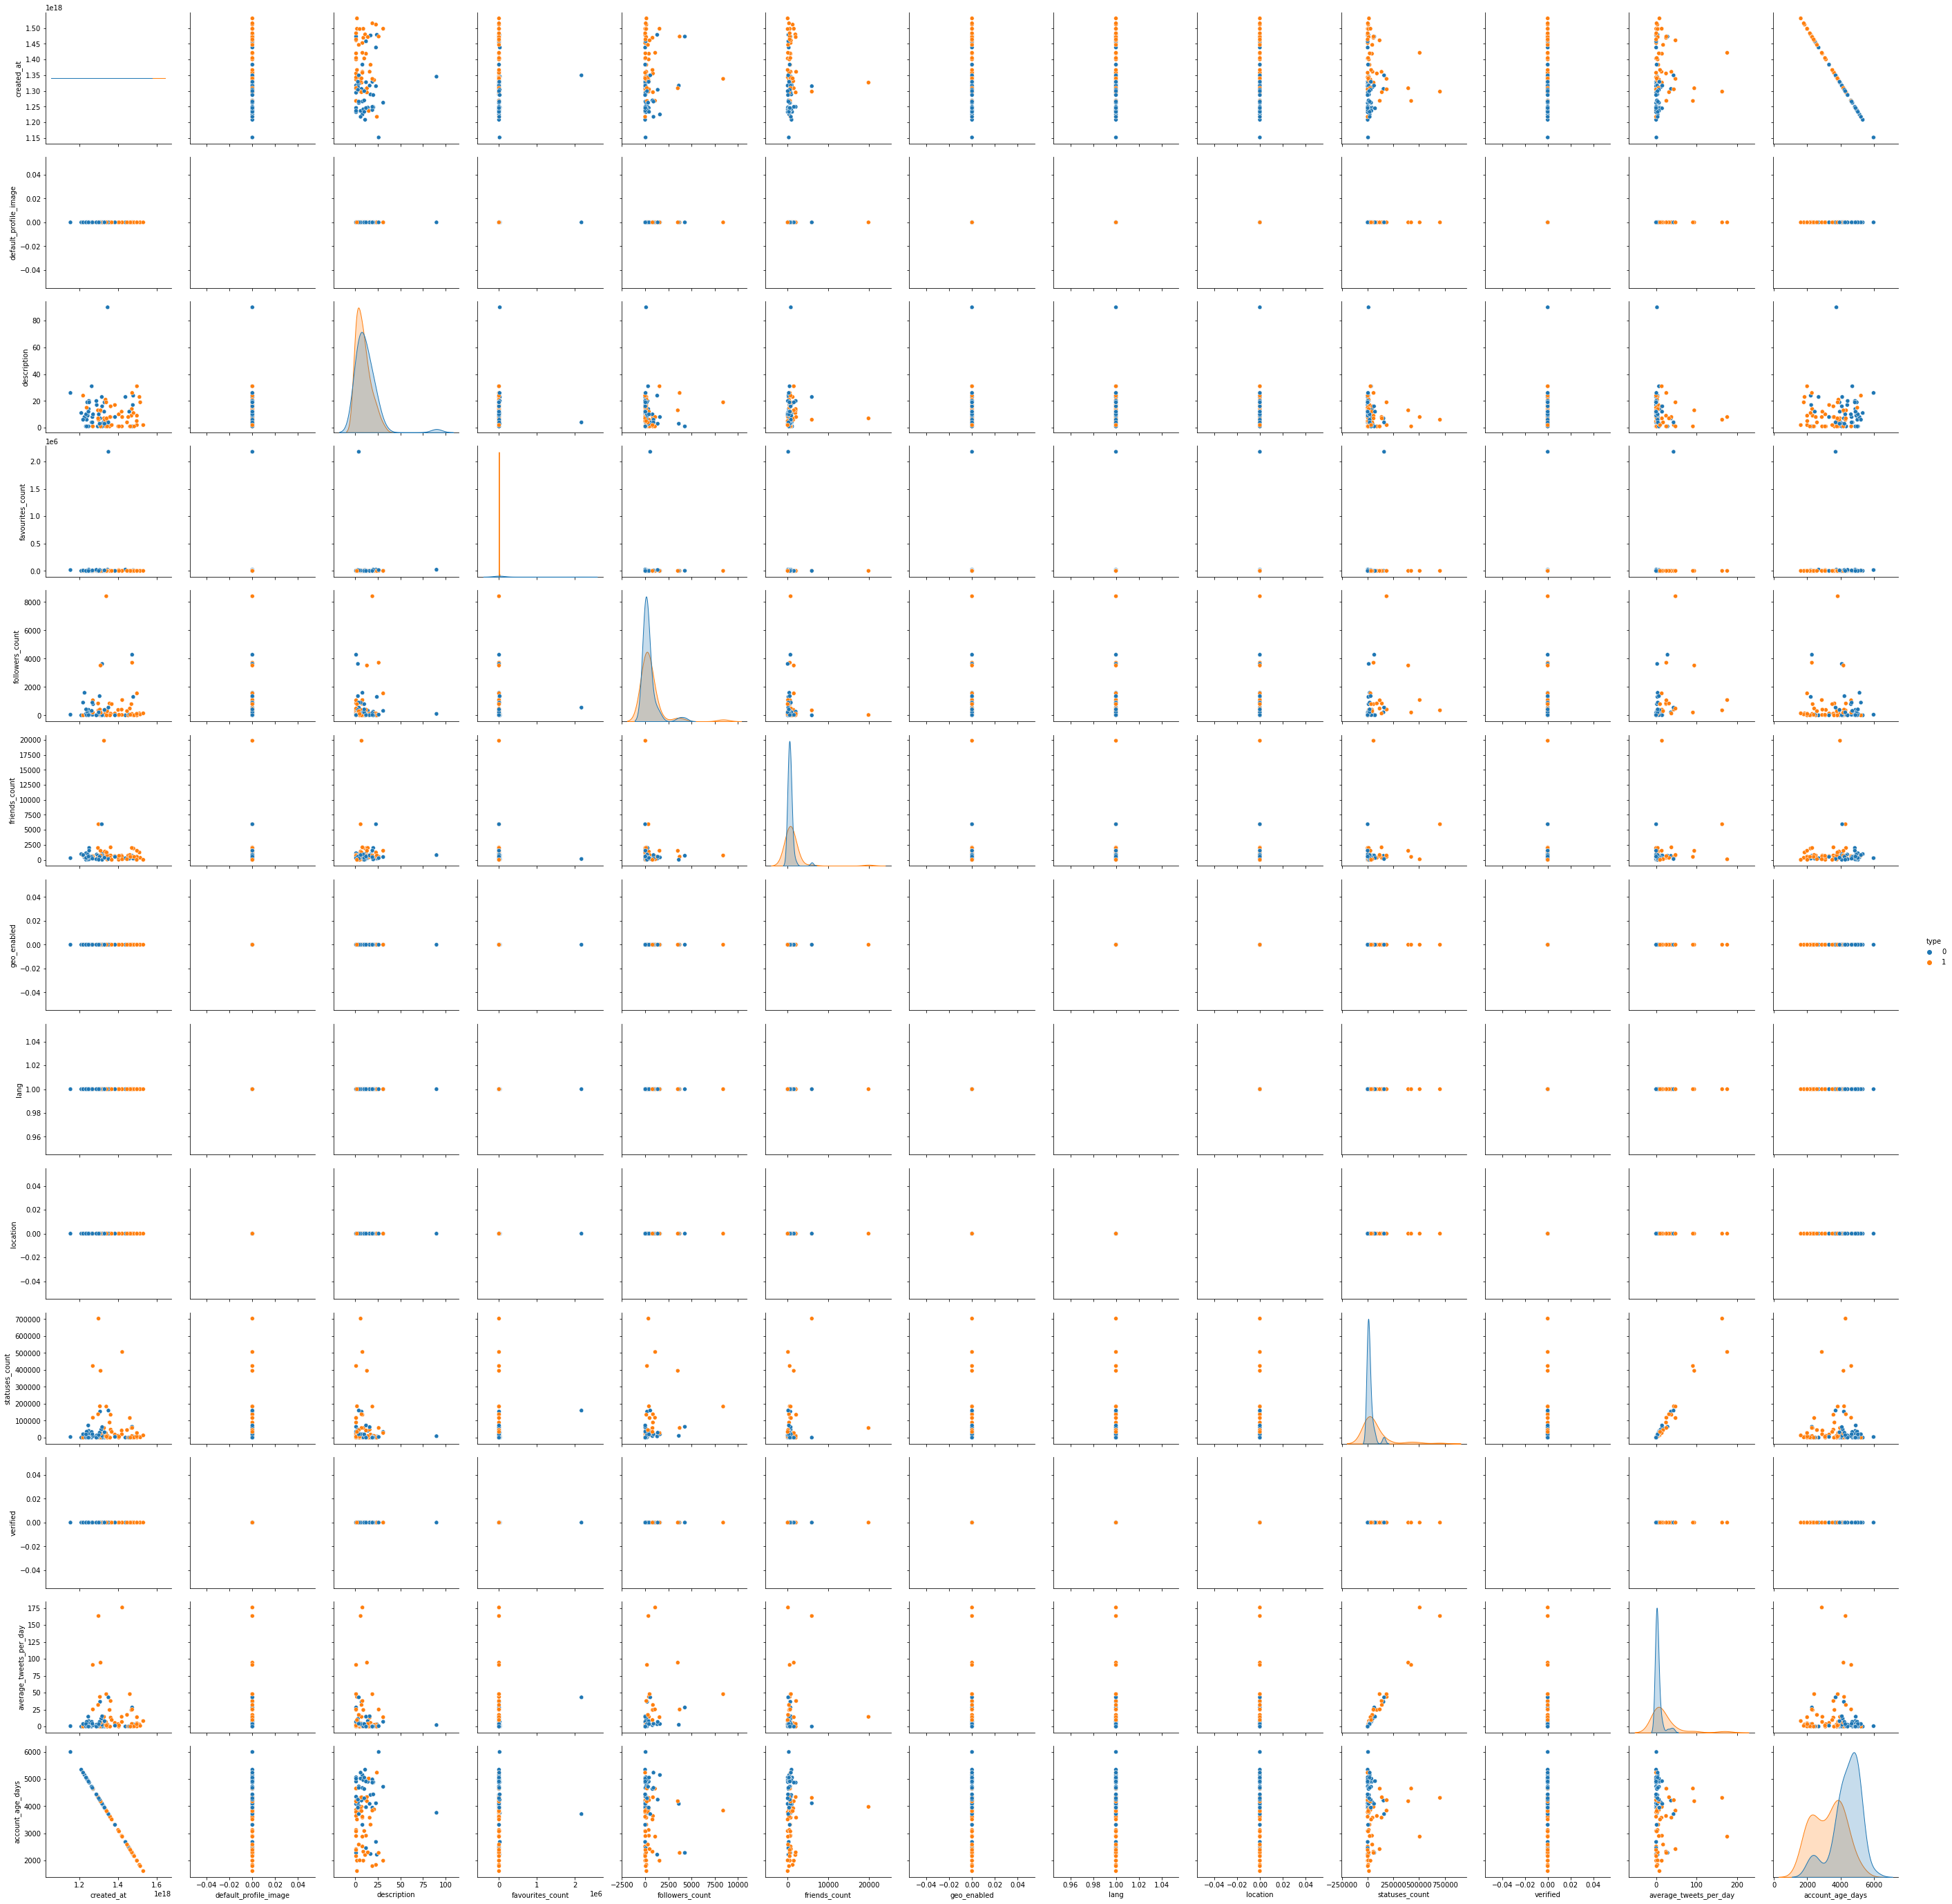

In [ ]:
sns.pairplot(result, hue="type", height=3)

In [ ]:
sns.pairplot(df_str, hue="account_type", height=5)


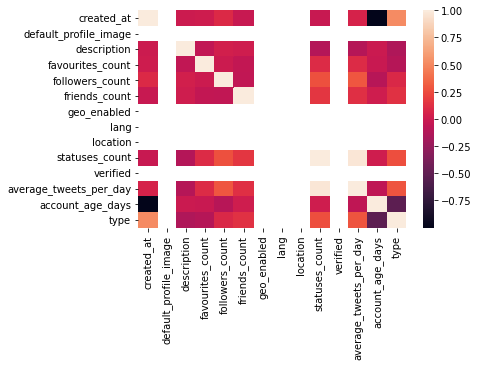

In [ ]:
sns.heatmap(result.corr())

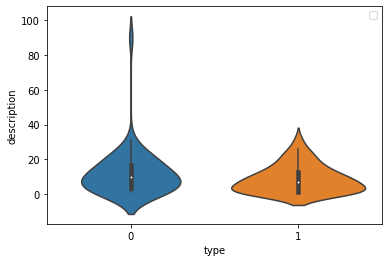

In [ ]:
sns.violinplot(data=result, x="type", y="description")
plt.legend([],[], frameon=True)

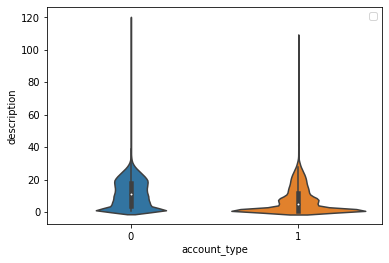

In [ ]:
sns.violinplot(data=df_str, x="account_type", y="description")
plt.legend([],[], frameon=True)

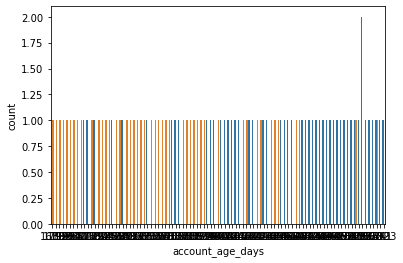

In [ ]:
sns.countplot(x='account_age_days', data=result, hue = 'type')
plt.legend([],[], frameon=False)

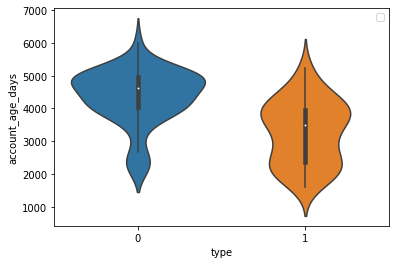

In [ ]:
sns.violinplot(data=result, x="type", y="account_age_days")
plt.legend([],[], frameon=True)

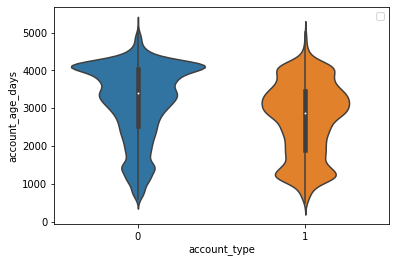

In [ ]:
sns.violinplot(data=df_str, x="account_type", y="account_age_days")
plt.legend([],[], frameon=True)

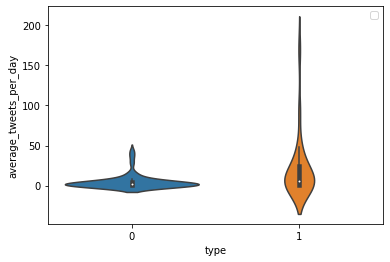

In [ ]:
sns.violinplot(data=result, x="type", y="average_tweets_per_day")
plt.legend([],[], frameon=True)

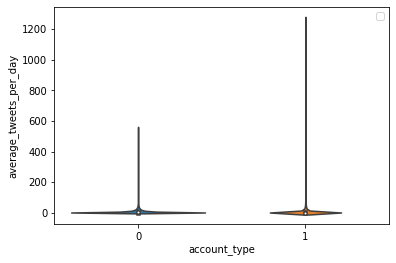

In [ ]:
sns.violinplot(data=df_str, x="account_type", y="average_tweets_per_day")
plt.legend([],[], frameon=True)

determine percentage bots vs humans

# Repeat Process for other tweets


In [ ]:
# copy this collab notebook! or change the query :)